<a href="https://colab.research.google.com/github/lovelyroz/ipynb/blob/main/%D8%A2%D9%86%D8%A7%D9%84%DB%8C%D8%B2_%D8%A8%D9%88%D8%B1%D8%B3_%D8%AA%D9%87%D8%B1%D8%A7%D9%86_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

# Stock Market Analysis + Prediction using LSTM

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
tech_list = ['Tameshk', 'Tavaan', 'vKharazm', 'Booali']
tameshk = pd.read_csv('/content/drive/My Drive/Colab Notebooks/csv/tameshk.csv')
tavaan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/csv/tavaan.csv')
vkharazm = pd.read_csv('/content/drive/My Drive/Colab Notebooks/csv/vkharazm.csv')
booali = pd.read_csv('/content/drive/My Drive/Colab Notebooks/csv/vbooali.csv')

df_tam = tameshk.copy()
df_tav = tavaan.copy()
df_kha = vkharazm.copy()
df_boo = booali.copy()
company_list = [df_tam,df_tav,df_kha,df_boo]
my_dict = {value: dataframe for value, dataframe in zip(tech_list, company_list)}

In [ ]:
df_tam.describe()

,Unnamed: 0,open,high,low,adjClose,value,volume,count,yesterday,close
count,112.000000,112.000000,112.000000,112.000000,112.000000,1.120000e+02,1.120000e+02,112.000000,112.000000,112.000000
mean,55.500000,13065.535714,13274.375000,12821.339286,13057.589286,1.760830e+11,1.350779e+07,1648.901786,13021.696429,13065.625000
std,32.475632,2100.287342,2136.920315,2011.469140,2071.426912,1.559180e+11,1.210823e+07,1090.805050,2089.351332,2079.842242
min,0.000000,9380.000000,9550.000000,9280.000000,9370.000000,1.240003e+10,1.289308e+06,345.000000,9370.000000,9410.000000
25%,27.750000,11192.500000,11445.000000,11062.500000,11295.000000,6.055876e+10,4.831892e+06,681.750000,11250.000000,11250.000000
50%,55.500000,13835.000000,14075.000000,13620.000000,13860.000000,1.363739e+11,1.094382e+07,1598.500000,13845.000000,13905.000000
75%,83.250000,14677.500000,14890.000000,14290.000000,14650.000000,2.444328e+11,1.795301e+07,2245.500000,14650.000000,14682.500000
max,111.000000,16890.000000,16890.000000,16300.000000,16620.000000,8.478788e+11,6.626113e+07,7124.000000,16620.000000,16660.000000


In [ ]:
df_tav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            151 non-null    object 
 1   open            151 non-null    float64
 2   high            151 non-null    float64
 3   low             151 non-null    float64
 4   adjClose        151 non-null    float64
 5   value           151 non-null    int64  
 6   volume          151 non-null    int64  
 7   count           151 non-null    int64  
 8   yesterday       151 non-null    float64
 9   close           151 non-null    float64
 10  Symbol          151 non-null    object 
 11  MA for 10 days  142 non-null    float64
 12  MA for 20 days  132 non-null    float64
 13  MA for 50 days  102 non-null    float64
 14  Daily Return    150 non-null    float64
dtypes: float64(10), int64(3), object(2)
memory usage: 17.8+ KB


### Closing Price


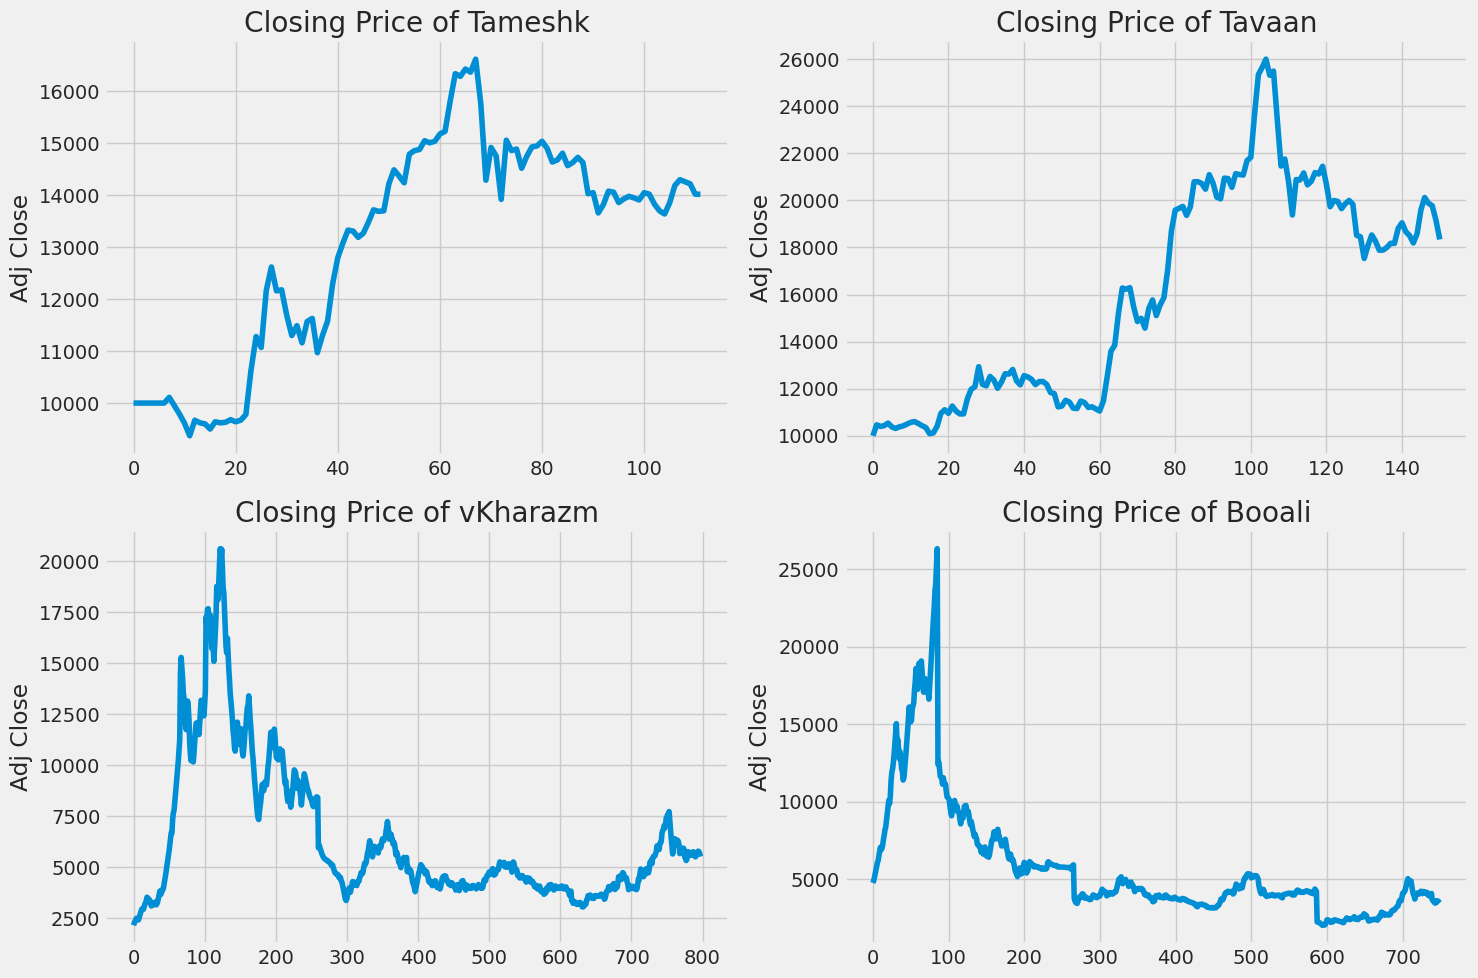

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['adjClose'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

### Volume of Sales

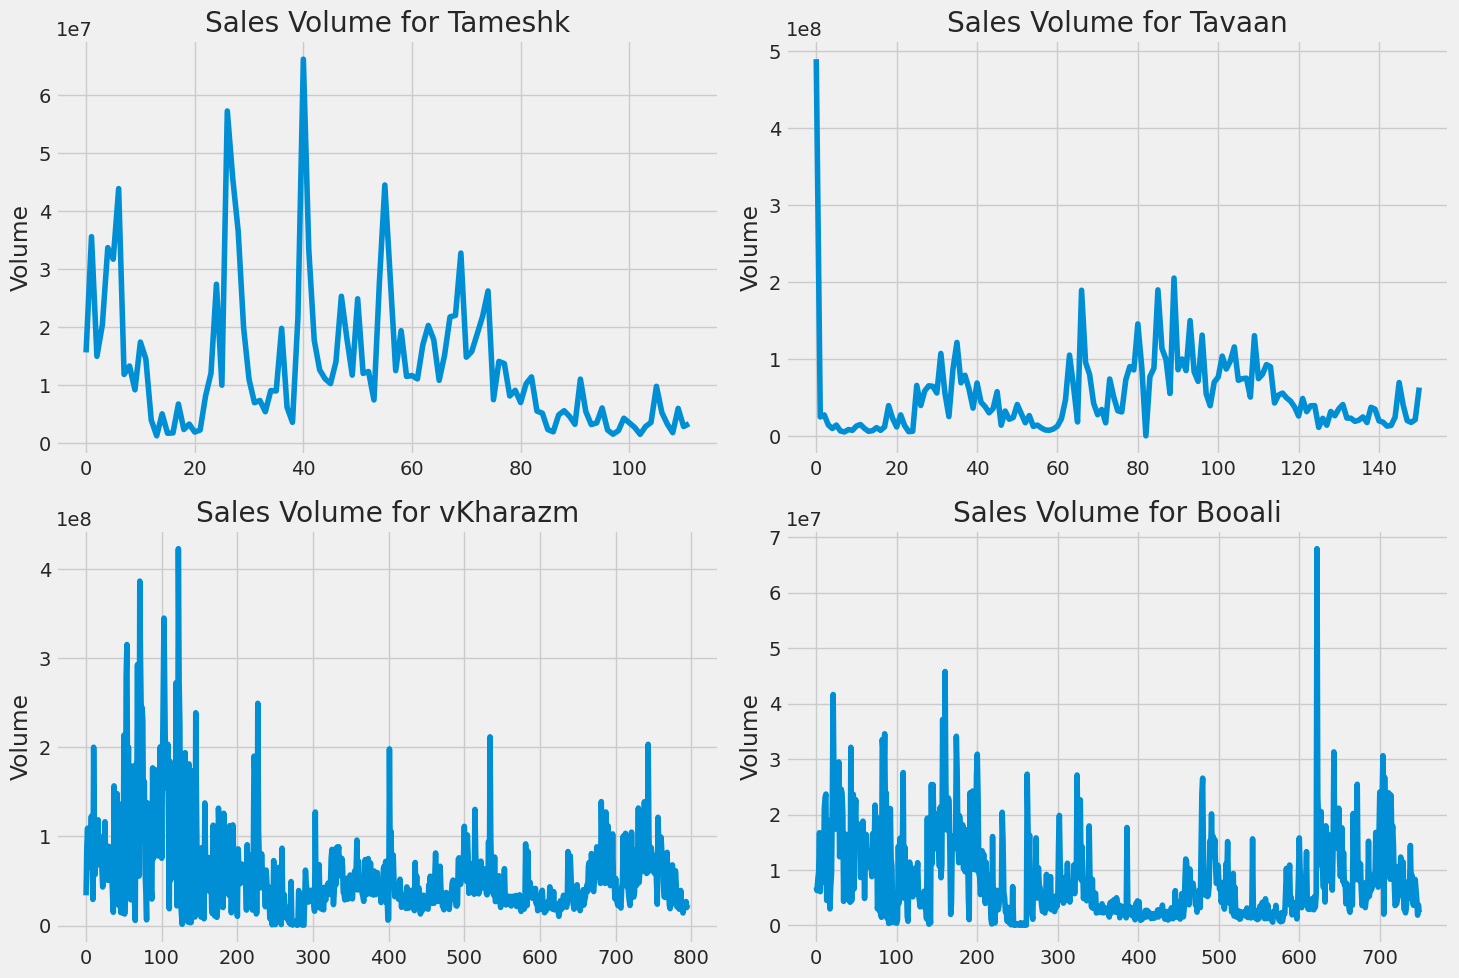

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

###What was the moving average of the various stocks?

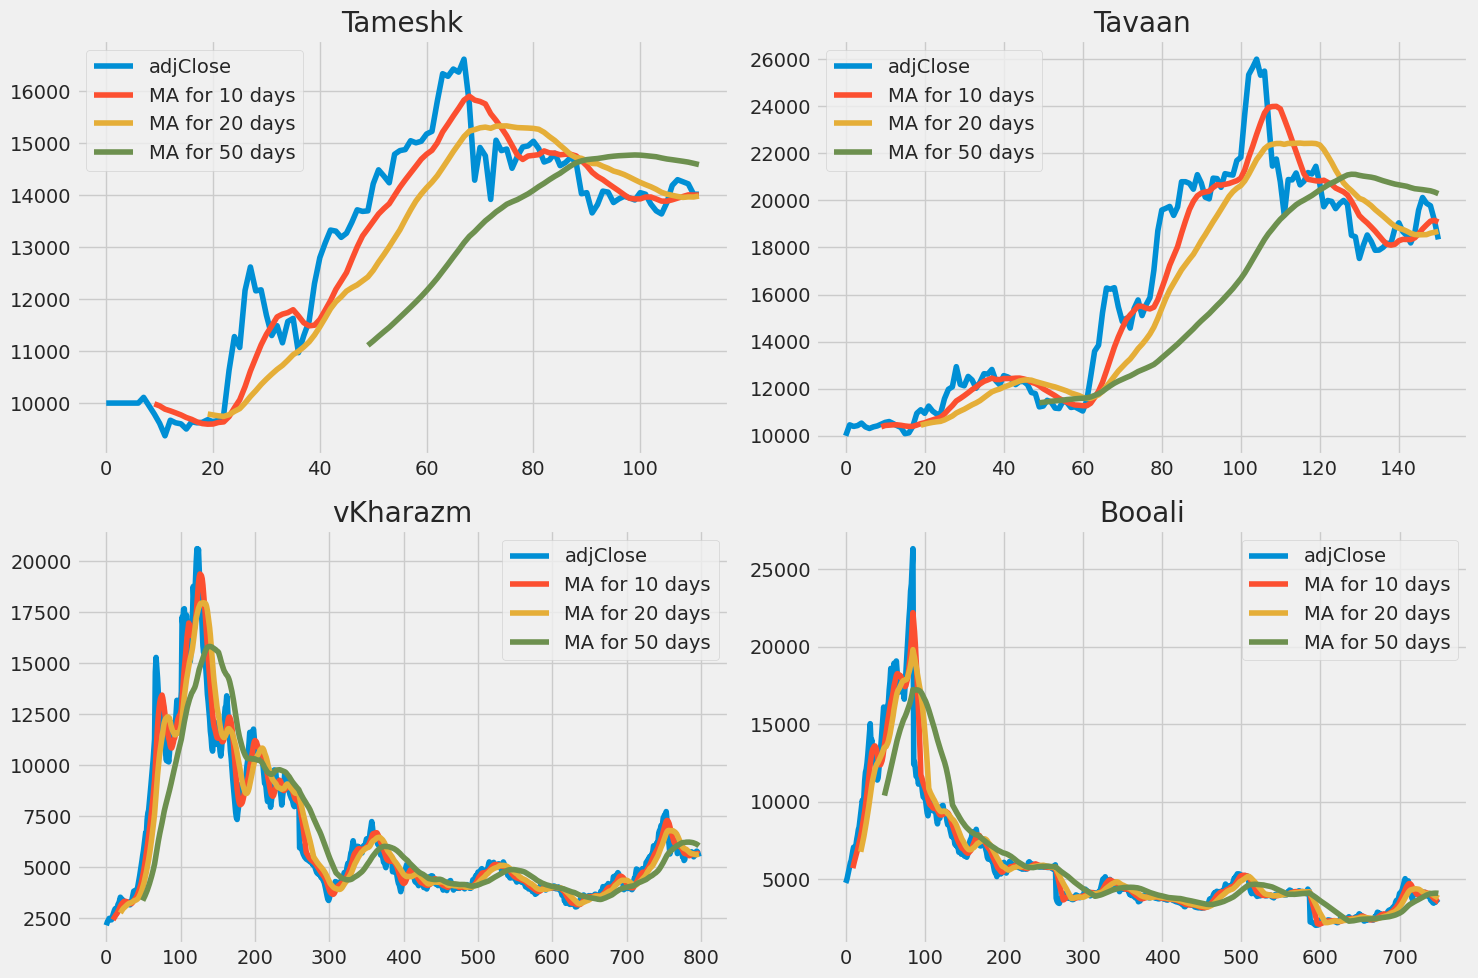

In [3]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['adjClose'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

df_tam[['adjClose', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Tameshk')

df_tav[['adjClose', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Tavaan')

df_kha[['adjClose', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('vKharazm')

df_boo[['adjClose', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Booali')

fig.tight_layout()

### What was the daily return of the stock on average?

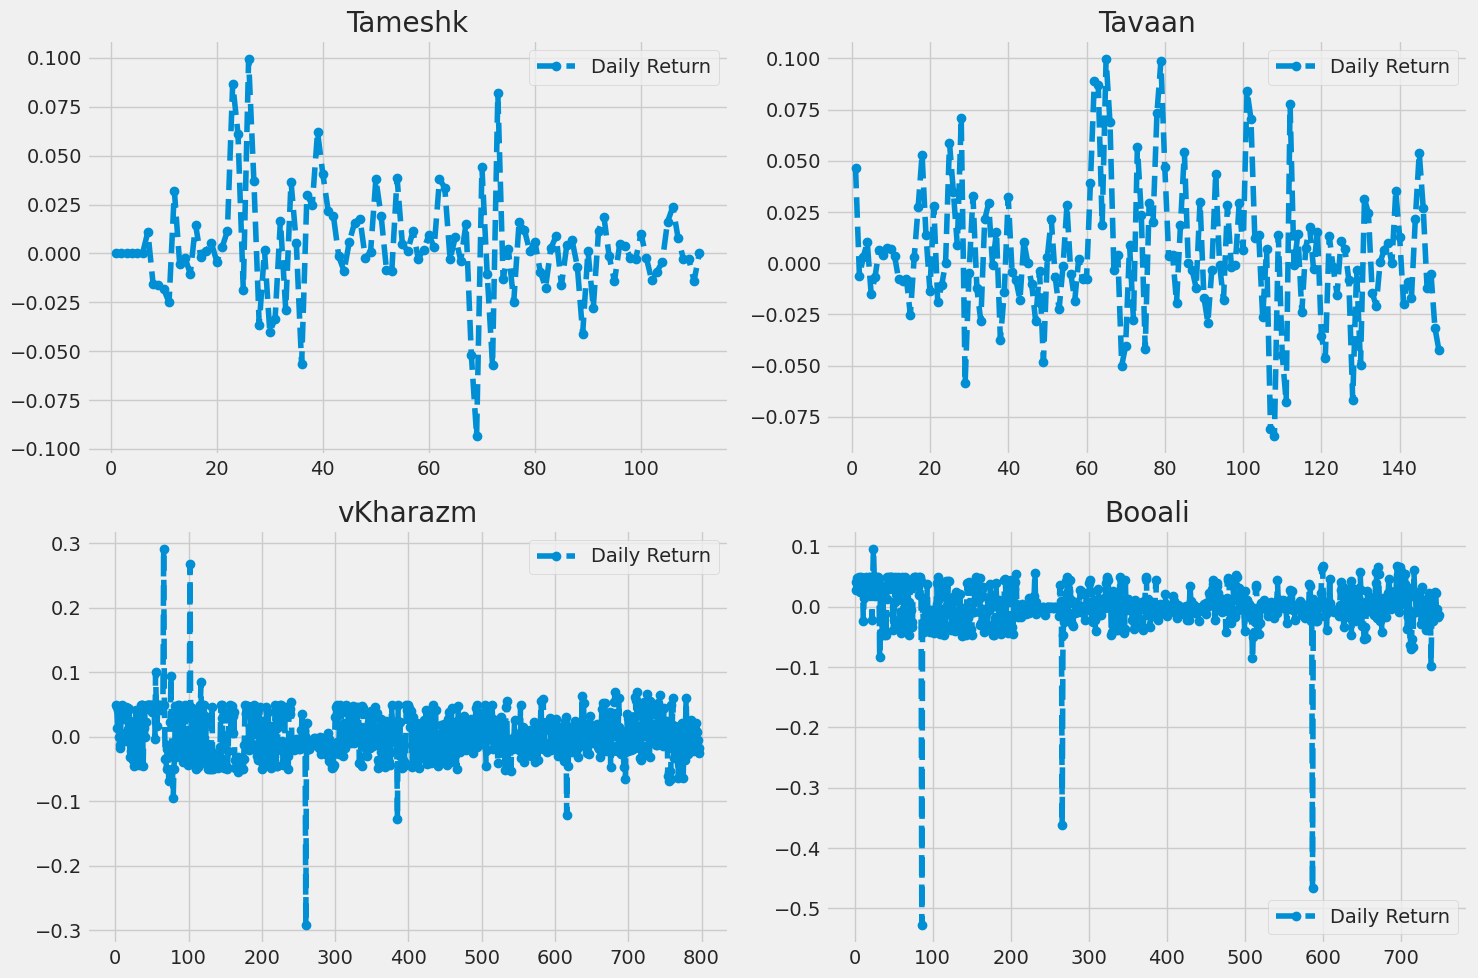

In [4]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['adjClose'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

df_tam['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Tameshk')

df_tav['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Tavaan')

df_kha['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('vKharazm')

df_boo['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Booali')

fig.tight_layout()

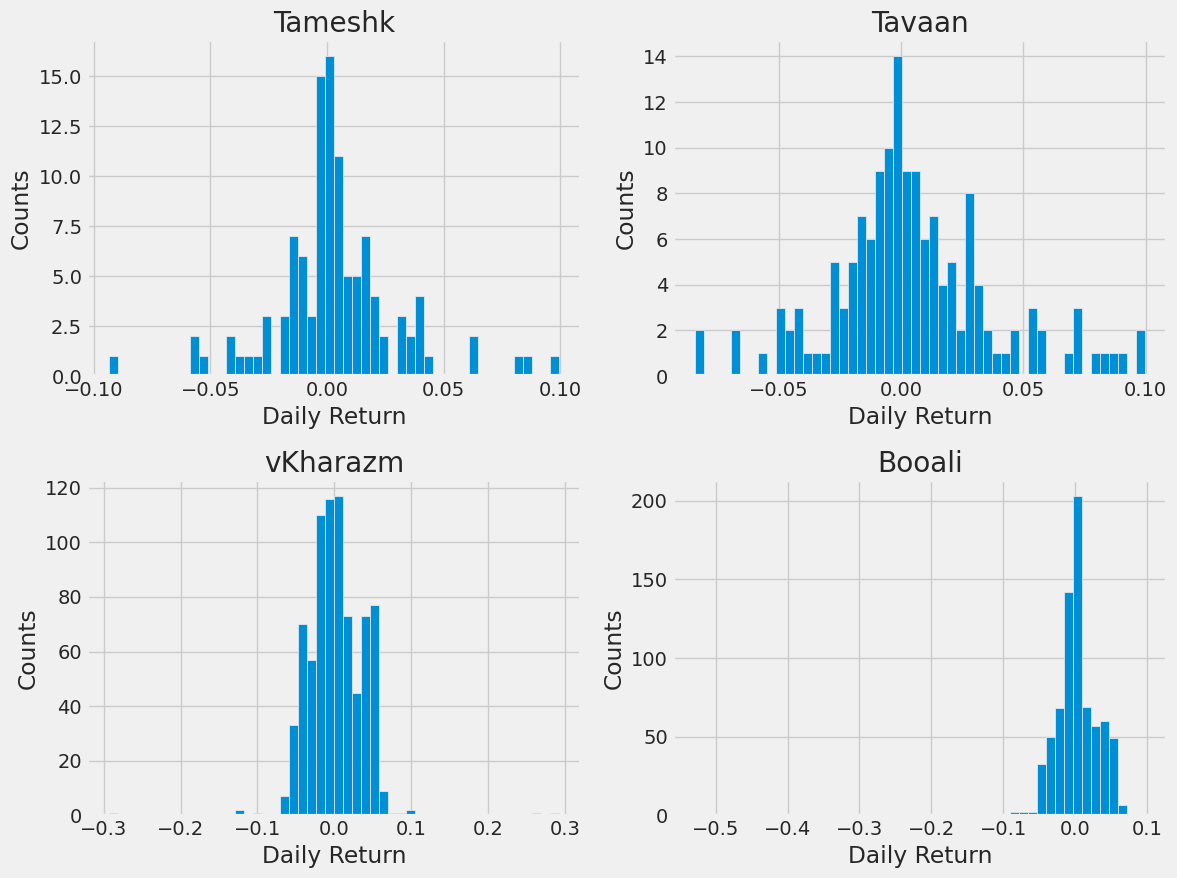

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{tech_list[i - 1]}')

plt.tight_layout()

### What was the correlation between different stocks closing prices?

In [6]:
selected_data = ['tameshk','tavaan','vkharazm','booali']
needed_data = []
for name , df in zip(selected_data,company_list):
    selected_cols = df[['date','adjClose']].rename({'adjClose':name},axis='columns')
    selected_cols['date'] = pd.to_datetime(selected_cols['date'])
    needed_data.append(selected_cols)
close_df = pd.DataFrame()
from functools import reduce

# Assuming you have four dataframes in a list


# Merge the dataframes based on their 'date' columns
merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='outer'), needed_data)
close_df = merged_df.sort_values('date')
close_df.set_index('date', inplace=True)

# Print the resulting dataframe
print(close_df)

            tameshk   tavaan  vkharazm  booali
date                                          
2020-01-12      NaN      NaN    2156.0     NaN
2020-01-13      NaN      NaN    2261.0     NaN
2020-01-14      NaN      NaN    2365.0     NaN
2020-01-15      NaN      NaN    2397.0     NaN
2020-01-18      NaN      NaN    2495.0     NaN
...             ...      ...       ...     ...
2023-07-04  14300.0  20120.0    5750.0  3632.0
2023-07-05  14260.0  19874.0    5790.0  3609.0
2023-07-08  14220.0  19770.0    5760.0  3598.0
2023-07-09  14020.0  19147.0    5660.0  3534.0
2023-07-10  14020.0  18339.0    5520.0  3485.0

[835 rows x 4 columns]


In [7]:
tech_rets = close_df.pct_change()
tech_rets.head()

,tameshk,tavaan,vkharazm,booali
date,,,,
2020-01-12,NaN,NaN,NaN,NaN
2020-01-13,NaN,NaN,0.048701,NaN
2020-01-14,NaN,NaN,0.045997,NaN
2020-01-15,NaN,NaN,0.013531,NaN
2020-01-18,NaN,NaN,0.040884,NaN


In [8]:
# Create a new dataframe with only the 'Close column
data = df_boo.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

713

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [18]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.11618596, 0.12255903, 0.1282376 , 0.13689844, 0.1471934 ,
       0.15830542, 0.16651687, 0.17893619, 0.1851867 , 0.19854563,
       0.2103113 , 0.19719748, 0.21427404, 0.21835934, 0.22763298,
       0.23886755, 0.25496364, 0.26983414, 0.2774328 , 0.29540812,
       0.31428221, 0.33103195, 0.33041915, 0.34149032, 0.38348721,
       0.40399542, 0.42822126, 0.40803987, 0.45436719, 0.47789852,
       0.50563772, 0.53427568, 0.47234251, 0.4803497 , 0.46143476,
       0.43778086, 0.45971893, 0.43091756, 0.41498488, 0.38937005,
       0.3820165 , 0.40701855, 0.41355503, 0.4375766 , 0.46241523,
       0.48962334, 0.51817959, 0.56001307, 0.57635428, 0.55919601,
       0.51997712, 0.55715336, 0.57226898, 0.57757987, 0.61107934,
       0.62129259, 0.65642618, 0.67889533, 0.63967644, 0.62987172])]
[0.6576517689353705]

[array([0.11618596, 0.12255903, 0.1282376 , 0.13689844, 0.1471934 ,
       0.15830542, 0.16651687, 0.17893619, 0.1851867 , 0.19854563,
       0.2103113 , 0.19719748, 0.214

In [11]:
! pip install keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

653/653 [==============================] - 20s 24ms/step - loss: 0.0051


In [20]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 12ms/step


274.2698275712181

<ipython-input-22-772029e6cc5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


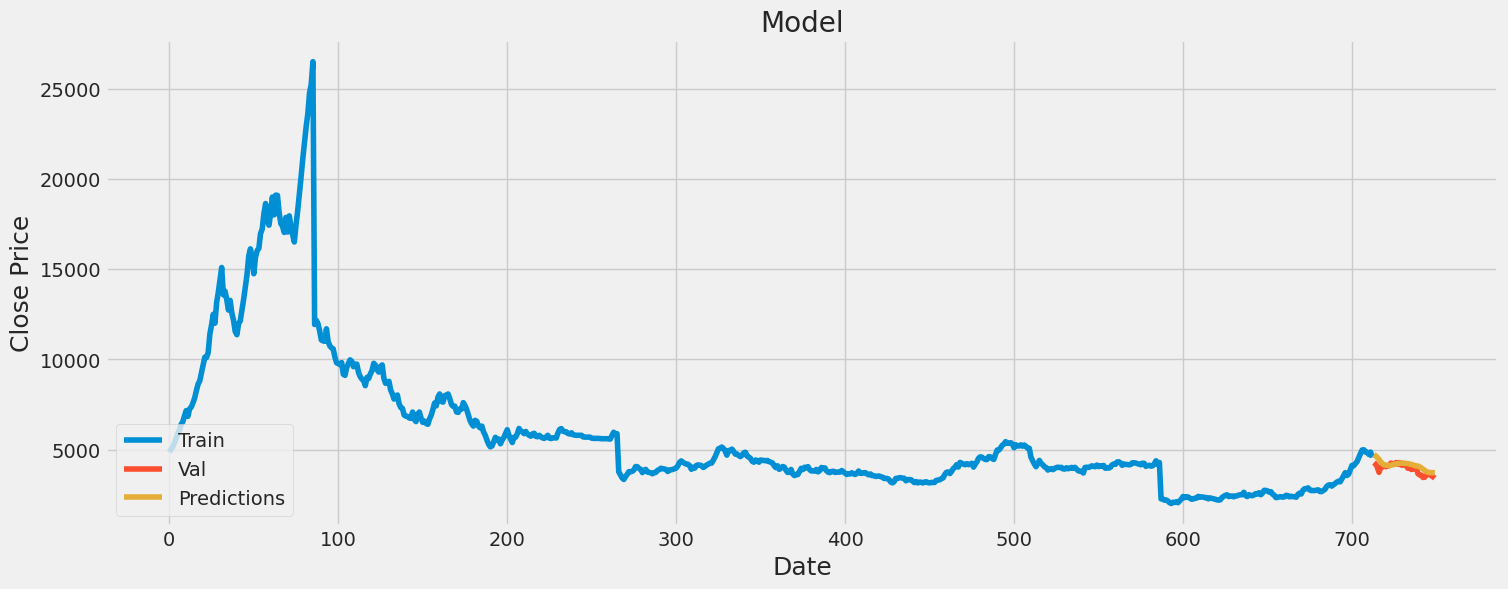

In [22]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
plt.show()

In [23]:
# Show the valid and predicted prices
valid

,close,Predictions
713,4277.0,4721.176758
714,4195.0,4653.847168
715,4019.0,4563.338867
716,3740.0,4454.814453
717,3994.0,4322.116699
718,4035.0,4222.427246
719,4155.0,4158.204102
720,4050.0,4134.040039
721,4090.0,4122.408691
722,4100.0,4122.508789


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(valid, *['close'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(valid, *['Predictions'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(valid, *['close'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(valid, *['Predictions'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(valid, *[[['close', 'Predictions']]], **{})
chart